# Malnutrition - Data Visualization

Anonuevo, John Carlo S.

Bautista, Jericho D.

Carreon, Hannah Mae B.

Librea, Mark Gelo M.

Torres, Tyrone Bruce


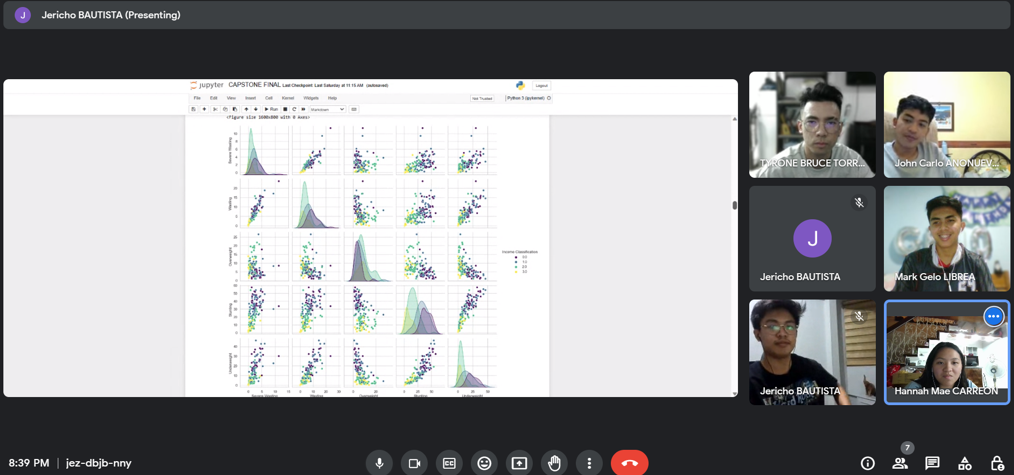





Section: T4A

Date Submitted

Submitted To: Engr. Aisa Mijeno-Labastilla, PCpE

**Major Assessment 3 / Capstone Assessment**

**Training and Evaluation of the Gathered Data**

**First Semester SY 2023-2024**

**IX. Program Codes (Jupyter notebook)**


In [496]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import warnings
from IPython.display import display


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.tree import DecisionTreeClassifier


from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

## 1. Data Exploration and Preprocessing:

In [497]:
# Loading Datasets
df_malnutrition = pd.read_csv('malnutrition-estimates.csv')
df_country_wise= pd.read_csv('country-wise-average.csv')

In [498]:
# Exploring Datasets

print("Malnutrition Dataset:")
display(df_malnutrition.head())

print("\nCountry-wise Average Dataset:")
display(df_country_wise.head())


Malnutrition Dataset:


,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225



Country-wise Average Dataset:


,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,ANGOLA,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


In [499]:
# Basic info about each dataset

print("\nMalnutrition Dataset Info:")
df_malnutrition.info()

print("\nCountry-wise Average Dataset Info:")
df_country_wise.info()


Malnutrition Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             924 non-null    int64  
 1   ISO code               924 non-null    object 
 2   Country                924 non-null    object 
 3   Survey Year            924 non-null    object 
 4   Year                   924 non-null    int64  
 5   Income Classification  924 non-null    int64  
 6   LDC                    924 non-null    float64
 7   LIFD                   924 non-null    float64
 8   LLDC or SID2           924 non-null    float64
 9   Survey Sample (N)      861 non-null    object 
 10  Severe Wasting         696 non-null    float64
 11  Wasting                877 non-null    float64
 12  Overweight             788 non-null    float64
 13  Stunting               887 non-null    float64
 14  Underweight            902 non

In [500]:
# Checking for missing values

print("\nMissing Values in Malnutrition Dataset:")
print(df_malnutrition.isnull().sum())

print("\nMissing Values in Country-wise Average Dataset:")
print(df_country_wise.isnull().sum())


Missing Values in Malnutrition Dataset:
Unnamed: 0                 0
ISO code                   0
Country                    0
Survey Year                0
Year                       0
Income Classification      0
LDC                        0
LIFD                       0
LLDC or SID2               0
Survey Sample (N)         63
Severe Wasting           228
Wasting                   47
Overweight               136
Stunting                  37
Underweight               22
Notes                    597
Report Author              0
Source                     0
Short Source               0
U5 Population ('000s)      0
dtype: int64

Missing Values in Country-wise Average Dataset:
Country                   0
Income Classification     0
Severe Wasting           12
Wasting                   2
Overweight                3
Stunting                  1
Underweight               2
U5 Population ('000s)     0
dtype: int64


In [501]:
# Handle missing Values

df_malnutrition_cleaned = df_malnutrition.dropna()
df_country_wise_cleaned = df_country_wise.dropna()


# Displaying

print("Cleaned dataframe for df_malnutrition:")
display(df_malnutrition_cleaned.head())

print("\nCleaned dataframe for df_country_wise:")
display(df_country_wise_cleaned.head())


Cleaned dataframe for df_malnutrition:


,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
29,29,AUS,AUSTRALIA,2007,2007,3,0.0,0.0,0.0,"1,007",0.0,0.0,7.7,2.0,0.2,Age-adjusted;,Australian Bureau of Statistics and Commonweal...,The 2007 national children's nutrition and phy...,Other,1328.020
36,36,AZE,AZERBAIJAN,2011,2011,2,0.0,0.0,1.0,"2,505",2.9,6.6,10.4,16.4,6.5,(pending reanalysis),Public Health and Reforms Center (PHRC) [Azerb...,"The Demographic and Health Survey, Azerbaijan,...",DHS-Style,734.346
42,42,BGD,BANGLADESH,1991,1991,1,1.0,1.0,0.0,"32,493",2.6,15.2,0.3,73.6,61.2,Adjusted NR to NA; nutritional surveillance,Helen Keller International (HKI) Bangladesh.,Nutritional Surveillance Project 1991: data on...,Surveillance,15998.584
43,43,BGD,BANGLADESH,1992,1992,1,1.0,1.0,0.0,"36,997",3.0,16.1,0.2,71.5,60.6,Adjusted NR to NA; nutritional surveillance,Helen Keller International (HKI) Bangladesh.,Nutritional Surveillance Project 1992: data on...,Surveillance,16042.636
44,44,BGD,BANGLADESH,1993,1993,1,1.0,1.0,0.0,"42,826",2.5,14.0,0.4,69.2,56.1,Adjusted NR to NA; nutritional surveillance,Helen Keller International (HKI) Bangladesh.,Nutritional Surveillance Project 1993: data on...,Surveillance,16047.015



Cleaned dataframe for df_country_wise:


,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,ANGOLA,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


In [502]:
# Perform descriptive statistics to understand the distribution of data.

descriptive_stats_malnutrition = df_malnutrition_cleaned.describe()

# Perform descriptive statistics for dataset 2

descriptive_stats_country_wise = df_country_wise_cleaned.describe()

# Display the descriptive statistics for both datasets

print("Descriptive Statistics for Malnutrition Dataset:")
display(descriptive_stats_malnutrition)

print("\nDescriptive Statistics for Country-wise Average Dataset:")
display(descriptive_stats_country_wise)


Descriptive Statistics for Malnutrition Dataset:


,Unnamed: 0,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,419.036364,2001.109091,1.454545,0.390909,0.481818,0.336364,1.945455,7.144545,5.120000,30.817273,18.865455,12882.893136
std,271.090591,9.490068,1.097423,0.490187,0.501956,0.594736,1.895027,5.542589,3.897371,19.293507,16.552809,28658.430594
min,29.000000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,2.000000,0.200000,1.000000
25%,169.500000,1994.000000,1.000000,0.000000,0.000000,0.000000,0.625000,2.525000,2.000000,13.675000,4.800000,375.853000
50%,425.500000,1999.500000,1.000000,0.000000,0.000000,0.000000,1.300000,5.200000,4.200000,32.750000,12.950000,1701.407000
75%,674.500000,2009.000000,2.000000,1.000000,1.000000,1.000000,2.575000,11.675000,7.800000,43.725000,27.500000,10706.882250
max,916.000000,2018.000000,3.000000,1.000000,1.000000,2.000000,9.800000,22.000000,17.200000,73.600000,61.200000,132966.782000



Descriptive Statistics for Country-wise Average Dataset:


,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,1.357143,2.168650,6.610275,7.067651,26.697061,13.871000,4305.708219
std,0.952629,1.708939,4.421861,4.704469,14.672849,11.071818,13685.407193
min,0.000000,0.000000,0.000000,0.962500,1.000000,0.100000,1.000000
25%,1.000000,0.900000,3.371250,3.650000,14.323214,4.355000,254.217167
50%,1.000000,1.872500,5.770000,6.218750,26.750000,10.821667,986.750100
75%,2.000000,2.822727,8.688095,9.016667,37.158333,20.481786,3236.924219
max,3.000000,11.400000,23.650000,26.500000,57.600000,46.266667,123014.491000


## 2. Linear Regression

In [503]:
# Define RMSE function
def RMSE(model, X, y):
    predicted = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, predicted))
    return rmse

# Define MAE function
def MAE(model, X, y):
    predicted = model.predict(X)
    mae = mean_absolute_error(y, predicted)
    return mae

# Select the independent and dependent variables

independent_variable = ['Income Classification']
X = df_country_wise_cleaned[independent_variable]
dependent_variable = ['Severe Wasting']
y = df_country_wise_cleaned[dependent_variable]

# Initialize the Linear Regression model

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# Calculate R2

severe_r2 = model.score(X, y)
severe_slope = model.coef_[0]
severe_int = model.intercept_

# Calculate RMSE and MAE

severe_rmse = RMSE(model,X,y)
severe_mae = MAE(model,X,y)

In [504]:
# Select the independent and dependent variables

independent_variable = ['Income Classification']
X = df_country_wise_cleaned[independent_variable]
dependent_variable = ['Wasting']
y = df_country_wise_cleaned[dependent_variable]

# Initialize the Linear Regression model

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# Calculate R2

wasting_r2 = model.score(X, y)
wasting_slope = model.coef_[0]
wasting_int = model.intercept_

# Calculate RMSE and MAE

wasting_rmse = RMSE(model,X,y)
wasting_mae = MAE(model,X,y)

In [505]:
# Select the independent and dependent variables

independent_variable = ['Income Classification']
X = df_country_wise_cleaned[independent_variable]
dependent_variable = ['Overweight']
y = df_country_wise_cleaned[dependent_variable]

# Initialize the Linear Regression model

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# Calculate R2 

overweight_r2 = model.score(X, y)
overweight_slope = model.coef_[0]
overweight_int = model.intercept_

# Calculate RMSE and MAE

overweight_rmse = RMSE(model,X,y)
overweight_mae = MAE(model,X,y)

In [506]:
# Select the independent and dependent variables

independent_variable = ['Income Classification']
X = df_country_wise_cleaned[independent_variable]
dependent_variable = ['Stunting']
y = df_country_wise_cleaned[dependent_variable]

# Initialize the Linear Regression model

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# Calculate R2

stunting_r2 = model.score(X, y)
stunting_slope = model.coef_[0]
stunting_int = model.intercept_

# Calculate RMSE and MAE

stunting_rmse = RMSE(model,X,y)
stunting_mae = MAE(model,X,y)

In [507]:
# Select the independent and dependent variables

independent_variable = ['Income Classification']
X = df_country_wise_cleaned[independent_variable]
dependent_variable = ['Underweight']
y = df_country_wise_cleaned[dependent_variable]

# Initialize the Linear Regression model

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# Calculate R2

underweight_r2 = model.score(X, y)
underweight_slope = model.coef_[0]
underweight_int = model.intercept_

# Calculate RMSE and MAE

underweight_rmse = RMSE(model,X,y)
underweight_mae = MAE(model,X,y)

<Figure size 1600x800 with 0 Axes>

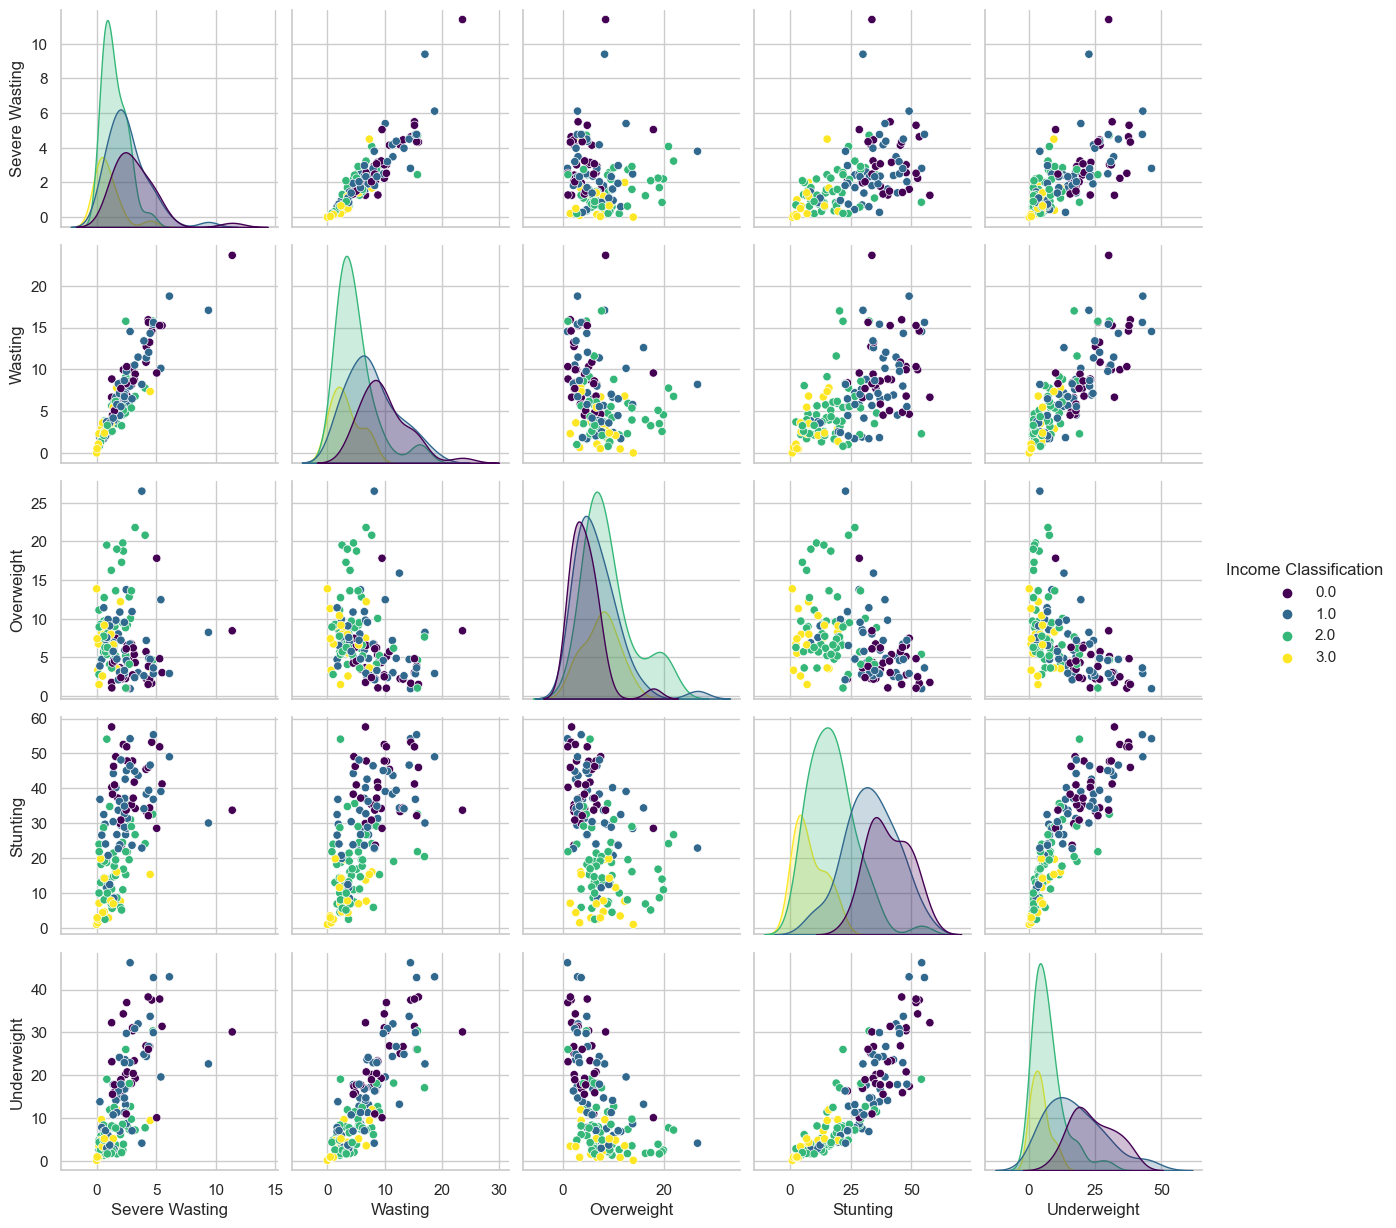

In [508]:
# Visualize the relationship between the independent and dependent variables.

# Select relevant columns for the pair plot

columns = ["Income Classification", "Severe Wasting", "Wasting", "Overweight", "Stunting", "Underweight"]

# Create a pair plot

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
sns.pairplot(df_country_wise[columns], height=2.5, palette = 'viridis',hue="Income Classification")
plt.show()

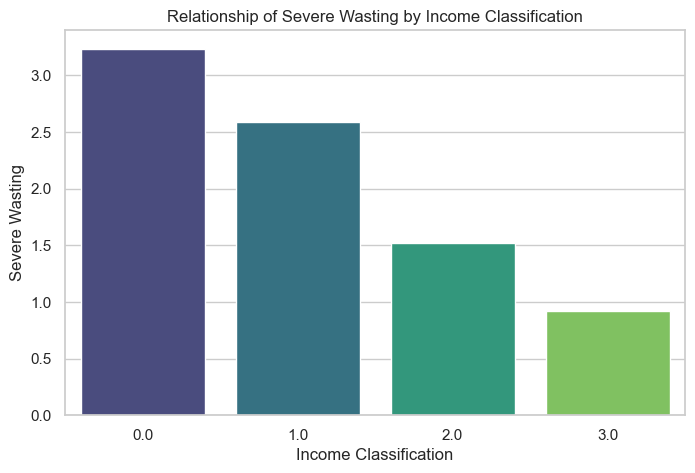

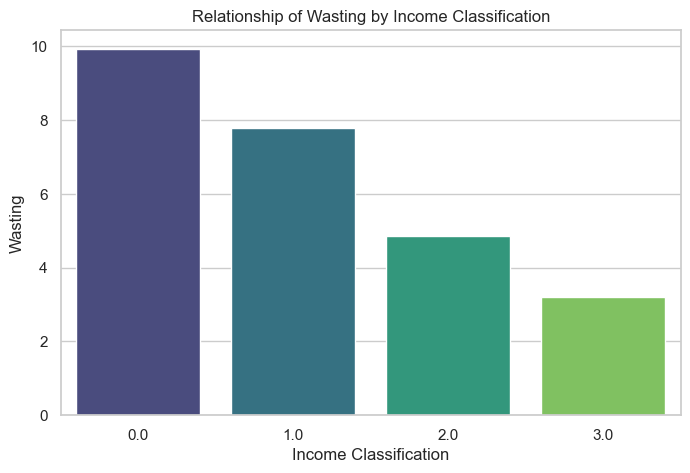

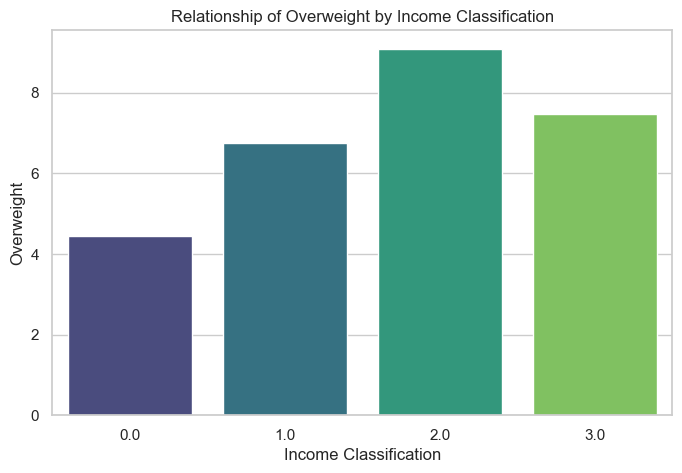

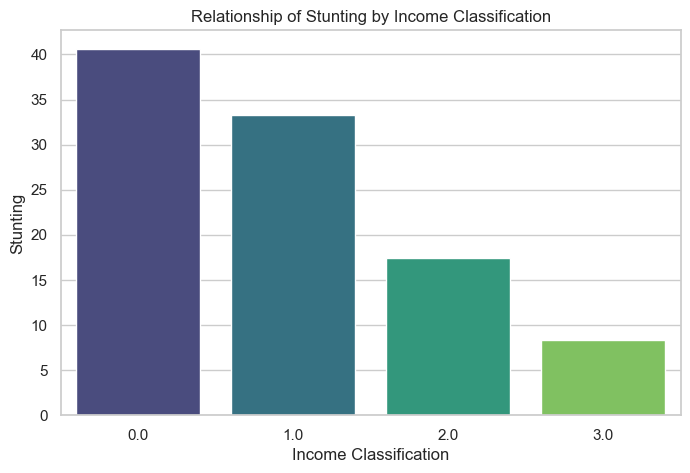

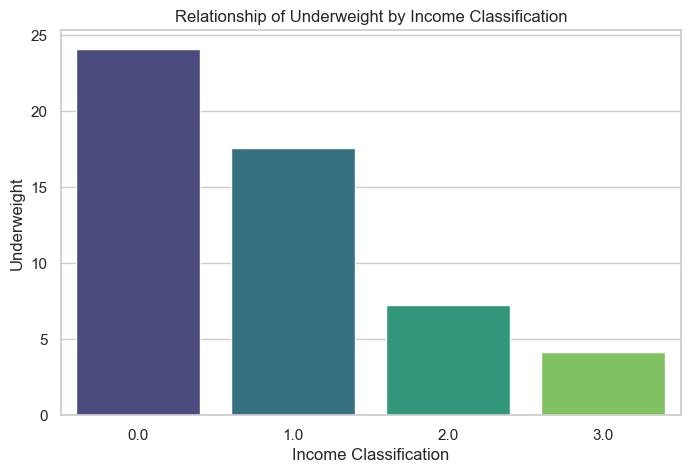

In [509]:
# Continuation in Visualizing the relationship between the independent and dependent variables.

# Selecting the x variable

x_variable = "Income Classification"

# Selecting all other variables for y

y_variables = ["Severe Wasting", "Wasting", "Overweight", "Stunting", "Underweight"]


# Creates bar graphs for each variable

for y_variable in y_variables:
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")
    sns.barplot(x=x_variable, y=y_variable, data=df_country_wise, errorbar=None, palette="viridis")
    plt.title(f"Relationship of {y_variable} by {x_variable}")
    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.show()

    

In [510]:
# Evaluate the model using appropriate metrics (e.g., Mean Squared Error).


print(f'Model coefficients for Severe Wasting:')
print('Model slope: %0.4f' % severe_slope)
print('Model intercept: %0.4f' % severe_int)

print(f'\nModel coefficients for Wasting:')
print('Model slope: %0.4f' % wasting_slope)
print('Model intercept: %0.4f' % wasting_int)

print(f'\nModel coefficients for Overweight:')
print('Model slope: %0.4f' % overweight_slope)
print('Model intercept: %0.4f' % overweight_int)

print(f'\nModel coefficients for Stunting:')
print('Model slope: %0.4f' % stunting_slope)
print('Model intercept: %0.4f' % stunting_int)

print(f'\nModel coefficients for Underweight:')
print('Model slope: %0.4f' % underweight_slope)
print('Model intercept: %0.4f' % underweight_int)

print('\nR2 fit:')
print('R-squared for Severe Wasting: %0.4f' % severe_r2)
print('R-squared for Wasting: %0.4f'% wasting_r2)
print('R-squared for Overweight: %0.4f' % overweight_r2)
print('R-squared for Stunting: %0.4f' % stunting_r2)
print('R-squared for Underweight" %0.4f' % underweight_r2)

Model coefficients for Severe Wasting:
Model slope: -0.8294
Model intercept: 3.2943

Model coefficients for Wasting:
Model slope: -2.4527
Model intercept: 9.9390

Model coefficients for Overweight:
Model slope: 1.4438
Model intercept: 5.1082

Model coefficients for Stunting:
Model slope: -11.5328
Model intercept: 42.3487

Model coefficients for Underweight:
Model slope: -7.6231
Model intercept: 24.2166

R2 fit:
R-squared for Severe Wasting: 0.2138
R-squared for Wasting: 0.2792
R-squared for Overweight: 0.0855
R-squared for Stunting: 0.5606
R-squared for Underweight" 0.4302


In [511]:
print('Severe Wasting:')
print('Model RMSE: %0.4f' % severe_rmse)
print('Model MAE: %0.4f' % severe_mae)

print('\nWasting:')
print('Model RMSE: %0.4f' % wasting_rmse)
print('Model MAE: %0.4f' % wasting_mae)

print('\nOverweight:')
print('Model RMSE: %0.4f' % overweight_rmse)
print('Model MAE: %0.4f' % overweight_mae)

print('\nStunting:')
print('Model RMSE: %0.4f' % stunting_rmse)
print('Model MAE: %0.4f' % stunting_mae)

print('\nUnderweight:')
print('Model RMSE: %0.4f' % underweight_rmse)
print('Model MAE: %0.4f' % underweight_mae)

Severe Wasting:
Model RMSE: 1.5099
Model MAE: 1.0704

Wasting:
Model RMSE: 3.7407
Model MAE: 2.8111

Overweight:
Model RMSE: 4.4828
Model MAE: 3.2599

Stunting:
Model RMSE: 9.6909
Model MAE: 7.7805

Underweight:
Model RMSE: 8.3277
Model MAE: 6.4186


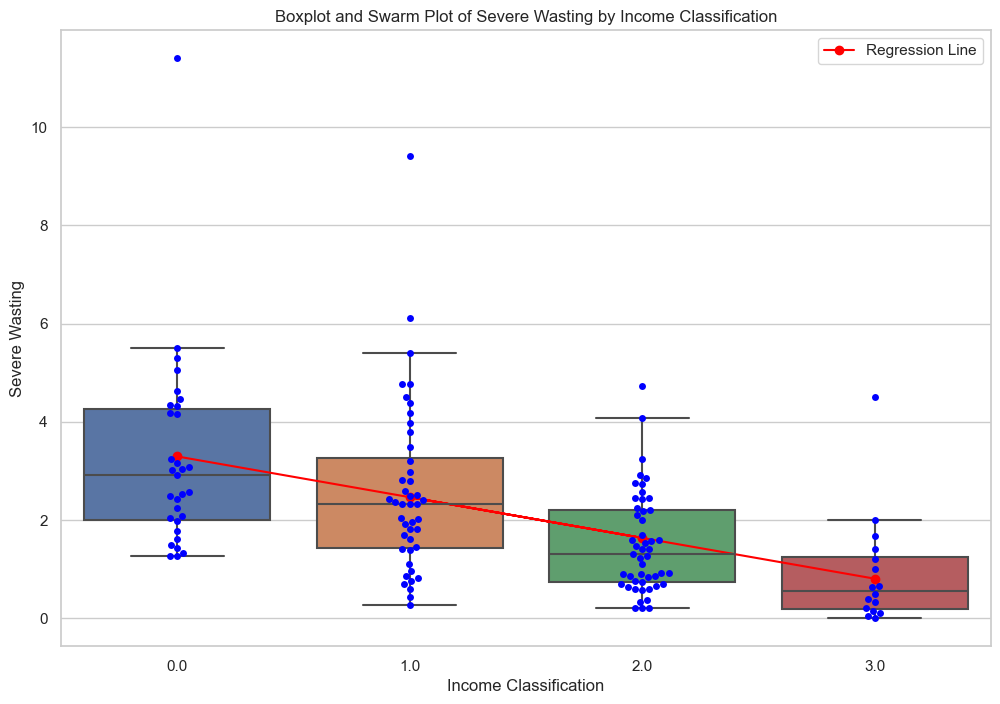

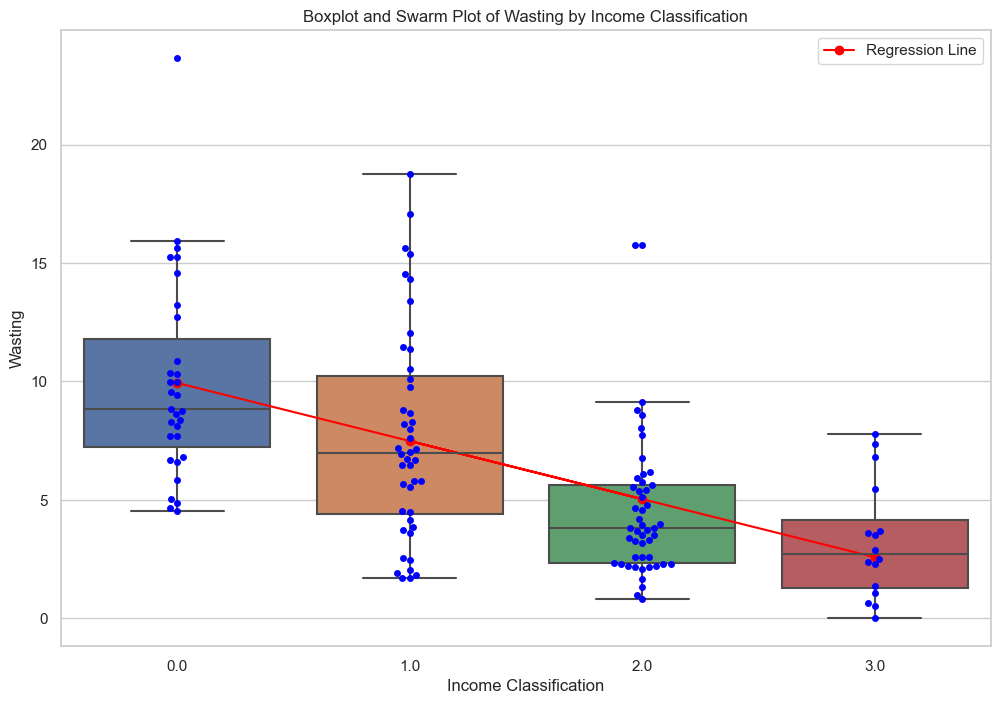

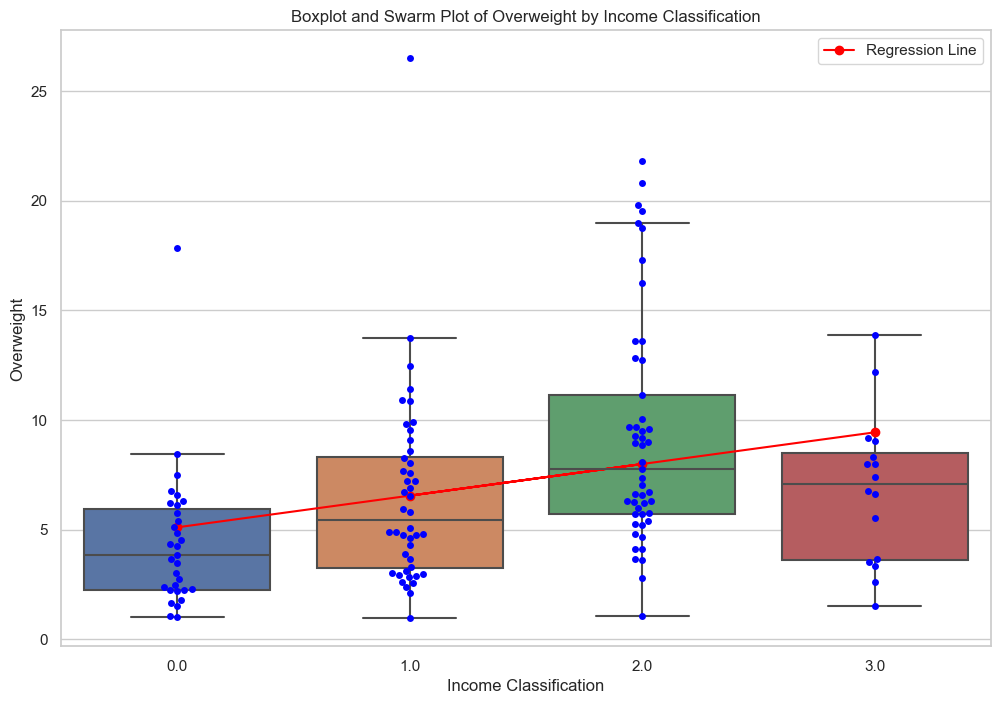

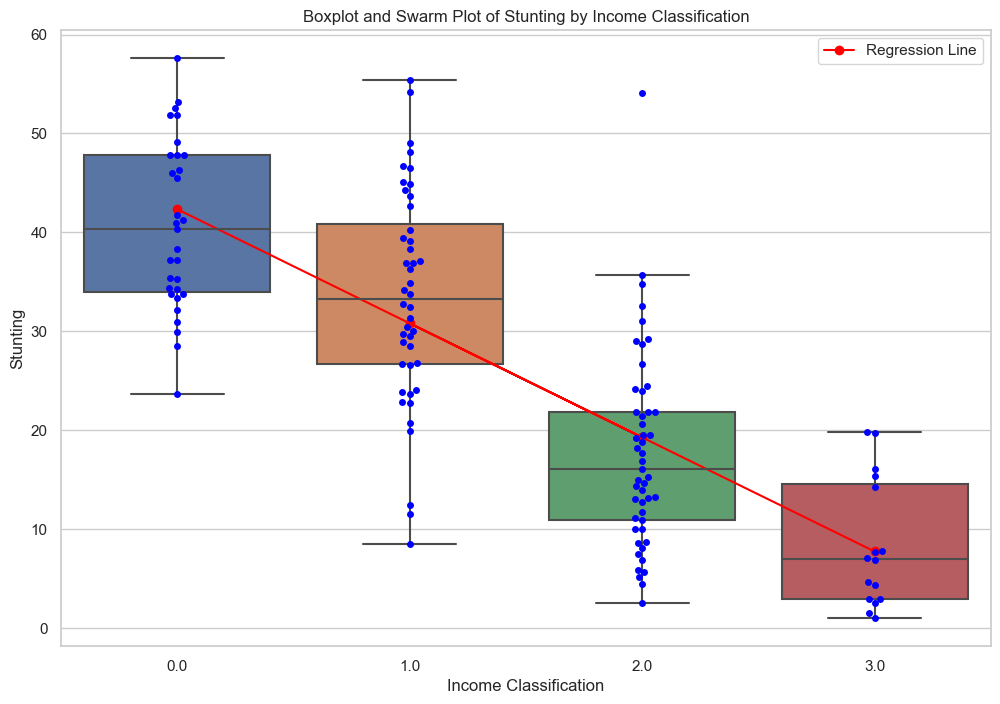

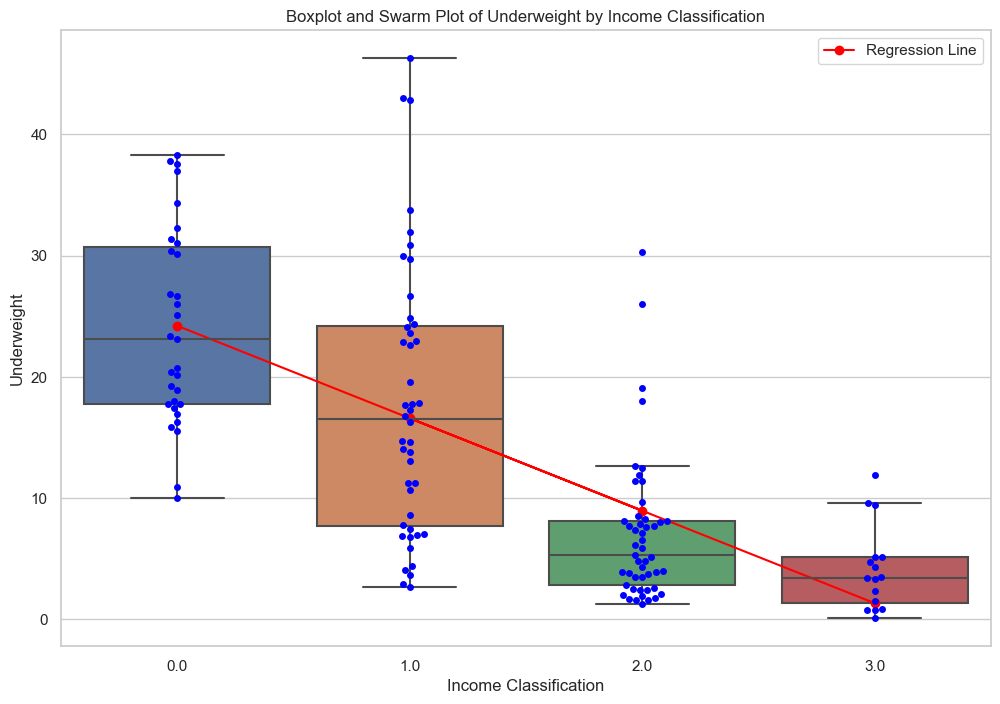

In [512]:
model_slope = severe_slope
model_intercept = severe_int
r2_value = severe_r2

# Create a boxplot with swarm plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income Classification', y='Severe Wasting', data=df_country_wise_cleaned, showfliers=False)  # set showfliers=False to exclude outliers
sns.swarmplot(x='Income Classification', y='Severe Wasting', data=df_country_wise_cleaned, color='blue')

# Plot the regression line
x_values = df_country_wise_cleaned['Income Classification'].unique()  # x-values for the regression line
y_values_predicted = model_slope * x_values + model_intercept
plt.plot(x_values, y_values_predicted, color='red', label='Regression Line', marker='o')

plt.title('Boxplot and Swarm Plot of Severe Wasting by Income Classification')
plt.xlabel('Income Classification')
plt.ylabel('Severe Wasting')
plt.legend()
plt.show()

###############################################################################################################################

model_slope = wasting_slope
model_intercept = wasting_int
r2_value = wasting_r2

# Create a boxplot with swarm plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income Classification', y='Wasting', data=df_country_wise_cleaned, showfliers=False)  # set showfliers=False to exclude outliers
sns.swarmplot(x='Income Classification', y='Wasting', data=df_country_wise_cleaned, color='blue')

# Plot the regression line
x_values = df_country_wise_cleaned['Income Classification'].unique()  # x-values for the regression line
y_values_predicted = model_slope * x_values + model_intercept
plt.plot(x_values, y_values_predicted, color='red', label='Regression Line', marker='o')

plt.title('Boxplot and Swarm Plot of Wasting by Income Classification')
plt.xlabel('Income Classification')
plt.ylabel('Wasting')
plt.legend()
plt.show()

###############################################################################################################################

model_slope = overweight_slope
model_intercept = overweight_int
r2_value = overweight_r2

# Create a boxplot with swarm plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income Classification', y='Overweight', data=df_country_wise_cleaned, showfliers=False)  # set showfliers=False to exclude outliers
sns.swarmplot(x='Income Classification', y='Overweight', data=df_country_wise_cleaned, color='blue')

# Plot the regression line
x_values = df_country_wise_cleaned['Income Classification'].unique()  # x-values for the regression line
y_values_predicted = model_slope * x_values + model_intercept
plt.plot(x_values, y_values_predicted, color='red', label='Regression Line', marker='o')

plt.title('Boxplot and Swarm Plot of Overweight by Income Classification')
plt.xlabel('Income Classification')
plt.ylabel('Overweight')
plt.legend()
plt.show()

###############################################################################################################################

model_slope = stunting_slope
model_intercept = stunting_int
r2_value = stunting_r2

# Create a boxplot with swarm plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income Classification', y='Stunting', data=df_country_wise_cleaned, showfliers=False)  # set showfliers=False to exclude outliers
sns.swarmplot(x='Income Classification', y='Stunting', data=df_country_wise_cleaned, color='blue')

# Plot the regression line
x_values = df_country_wise_cleaned['Income Classification'].unique()  # x-values for the regression line
y_values_predicted = model_slope * x_values + model_intercept
plt.plot(x_values, y_values_predicted, color='red', label='Regression Line', marker='o')

plt.title('Boxplot and Swarm Plot of Stunting by Income Classification')
plt.xlabel('Income Classification')
plt.ylabel('Stunting')
plt.legend()
plt.show()

###############################################################################################################################

model_slope = underweight_slope
model_intercept = underweight_int
r2_value = underweight_r2

# Create a boxplot with swarm plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income Classification', y='Underweight', data=df_country_wise_cleaned, showfliers=False)  # set showfliers=False to exclude outliers
sns.swarmplot(x='Income Classification', y='Underweight', data=df_country_wise_cleaned, color='blue')

# Plot the regression line
x_values = df_country_wise_cleaned['Income Classification'].unique()  # x-values for the regression line
y_values_predicted = model_slope * x_values + model_intercept
plt.plot(x_values, y_values_predicted, color='red', label='Regression Line', marker='o')

plt.title('Boxplot and Swarm Plot of Underweight by Income Classification')
plt.xlabel('Income Classification')
plt.ylabel('Underweight')
plt.legend()
plt.show()

## 3. Logistic Regression

In [513]:
#If your dataset involves classification, implement logistic regression

#Income Classification is a multi-class target variable so it would be simplified into two classes for logistics regression 
#for the 4 classes of Income namely, low and lower-middle are grouped into one as class 0 and upper-middle and rich are grouped
#into one as class 1
X_single = df_country_wise_cleaned[['Stunting']]
y_single = df_country_wise_cleaned['Income Classification']




In [514]:
# Split the dataset into training and testing sets.

# Combine classes 0 and 1 into class 0, and classes 2 and 3 into class 1 for a simplified binary classification
y_binary_single = y_single.apply(lambda x: 0 if x in [0, 1] else 1)

# Split the data into training and testing sets
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single, y_binary_single, test_size=0.2, random_state=42)


Accuracy: 0.9286
Precision: 0.9231
Recall: 0.9231
F1-score: 0.9231


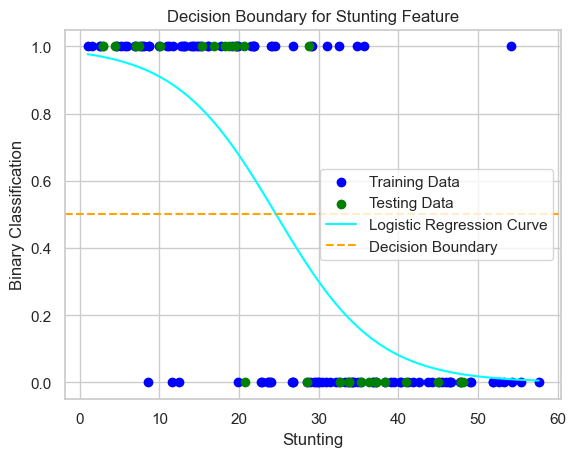

In [516]:
# Train the logistic regression model and evaluate its performance using accuracy, precision, recall, and F1-score.

# Train a logistic regression model
model_single = LogisticRegression()
model_single.fit(X_train_single, y_train_single)

# Evaluate the performance
test_predict_single = model_single.predict(X_test_single)
accuracy_single = accuracy_score(y_test_single, test_predict_single)
precision_single = precision_score(y_test_single, test_predict_single)
recall_single = recall_score(y_test_single, test_predict_single)
f1_single = f1_score(y_test_single, test_predict_single)

print('Accuracy: %0.4f' % accuracy_single)
print('Precision: %0.4f' % precision_single)
print('Recall: %0.4f' % recall_single)
print('F1-score: %0.4f' % f1_single)

# Visualize the decision boundary
wasting_values = np.linspace(X_single.min(), X_single.max(), 100).reshape(-1, 1)
probabilities_single = model_single.predict_proba(wasting_values)[:, 1]

plt.scatter(X_train_single, y_train_single, color='blue', label='Training Data')
plt.scatter(X_test_single, y_test_single, color='green', label='Testing Data')
plt.plot(wasting_values, probabilities_single, color='cyan', label='Logistic Regression Curve')
plt.title('Decision Boundary for Stunting Feature')
plt.xlabel('Stunting')
plt.ylabel('Binary Classification')
plt.axhline(0.5, color='orange', linestyle='--', label='Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


##### Train the logistic regression model and evaluate its performance using accuracy, precision, recall, and F1-score.

## 4.  Classification Models:

Accuracy: 0.6470588235294118
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.57      0.73         7
         1.0       0.33      0.67      0.44         3
         2.0       0.60      1.00      0.75         3
         3.0       1.00      0.50      0.67         4

    accuracy                           0.65        17
   macro avg       0.73      0.68      0.65        17
weighted avg       0.81      0.65      0.67        17

Confusion Matrix:
 [[4 3 0 0]
 [0 2 1 0]
 [0 0 3 0]
 [0 1 1 2]]


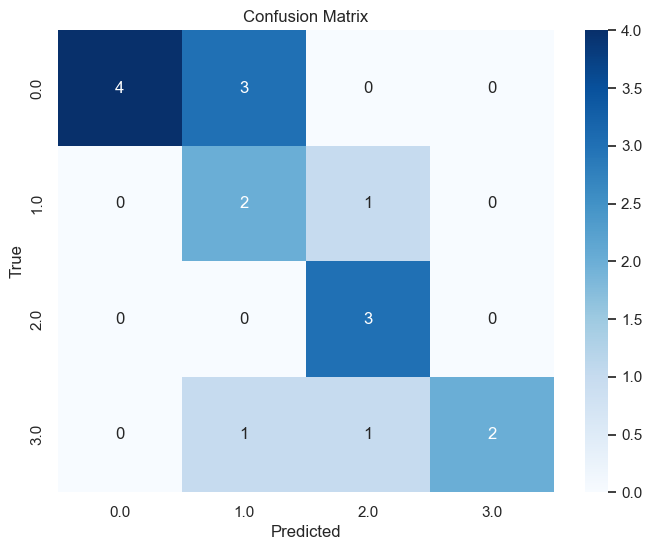

In [517]:
# X contains independent variables and y contains the dependent variable
independent_columns = ['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']
X = df_country_wise_cleaned[independent_columns]
y = df_country_wise_cleaned['Income Classification']

# Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

# Create a Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')

# Fit the model on the training dataset
svm_model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = svm_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)
print("Confusion Matrix:\n", conf_matrix)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.4642857142857143
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.22      0.31         9
         1.0       0.27      0.50      0.35         6
         2.0       0.56      0.62      0.59         8
         3.0       0.75      0.60      0.67         5

    accuracy                           0.46        28
   macro avg       0.52      0.49      0.48        28
weighted avg       0.51      0.46      0.46        28

Confusion Matrix:
 [[2 6 1 0]
 [2 3 1 0]
 [0 2 5 1]
 [0 0 2 3]]


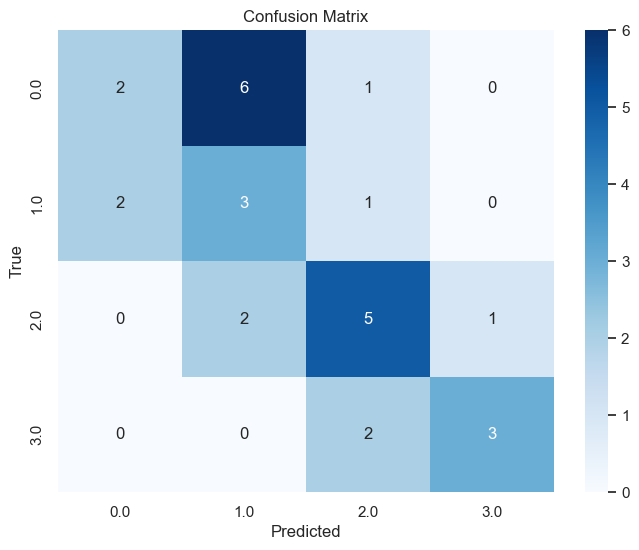

In [404]:
# Assuming X contains independent variables and y contains the dependent variable
independent_columns = ['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']
X = df_country_wise_cleaned[independent_columns]
y = df_country_wise_cleaned['Income Classification']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()

# Fit the model on the training dataset
dt_model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)
print("Confusion Matrix:\n", conf_matrix)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.5714285714285714
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.43      0.55         7
         1.0       0.29      0.50      0.36         4
         2.0       0.62      0.83      0.71         6
         3.0       1.00      0.50      0.67         4

    accuracy                           0.57        21
   macro avg       0.67      0.57      0.57        21
weighted avg       0.67      0.57      0.58        21

Confusion Matrix:
 [[3 4 0 0]
 [1 2 1 0]
 [0 1 5 0]
 [0 0 2 2]]


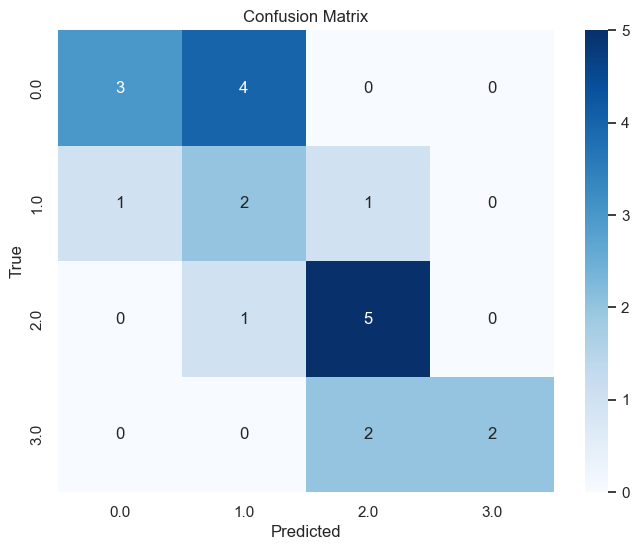

In [520]:
# X contains independent variables and y contains the dependent variable
independent_columns = ['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']
X = df_country_wise_cleaned[independent_columns]
y = df_country_wise_cleaned['Income Classification']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training dataset
rf_model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)
print("Confusion Matrix:\n", conf_matrix)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## 6. Model Comparison and Conclusion



# Compare the performance of all models used in the project.
Discuss the strengths and weaknesses of each model.
Provide insights into which model performed best and why.

In this CAPSTONE project, the students explored the performance of several models, including Linear Regression, Logistic Regression, Support Vector Machine (SVM), Decision Tree, and Random Forest.

## Linear Regression:
###### Strengths:
Linear regression provides clear and interpretable coefficients for each feature. This means that it can easily understand the impact of each predictor variable on the target variable
Achieved relatively high R2 values for predicting 'Stunting.' The relatively high R2 for predicting 'Stunting' indicates that the linear regression model performed well in explaining the variation in this specific variable.
##### Weaknesses:
The limited performance on other variables suggests that linear regression might not have been as effective in capturing the relationships for some of the other variables like 'Severe Wasting,' 'Wasting,' 'Overweight,' and 'Underweight.' 
Another is that outliers can disproportionately influence the slope and intercept of the regression line, potentially impacting the model's accuracy. Which is why is it imperative to eliminate outliers in the dataset before performing any analysis

## Logistic Regression:
##### Strengths:
Logistic regression is suitable for binary classification tasks. High overall accuracy (0.93) with balanced precision and recall indicating that the model is effective at making correct predictions on the majority of instances. A balanced precision and recall mean that the model performs well in both correctly identifying positive instances (precision) and capturing all actual positive instances (recall). 
##### Weaknesses:
May not handle complex relationships in the data as effectively. The decision to group the four income classes into two for binary classification using Logistic Regression can simplify the model and make it more interpretable. However, this simplification comes at the cost of potentially losing information present in the original four classes. If the relationships between features and income classes are complex and nonlinear, logistic regression may struggle to capture these nuances effectively.

## Support Vector Machine (SVM):
##### Strengths:
The SVM model achieved a moderate accuracy of 0.65 on the test dataset. While it is not the highest accuracy among the models used, it suggests a reasonable ability to make correct predictions with potential for improvement. The SVM model also provides flexibility with different kernel functions which are versatile and can handle different types of relationships between features and classes by using various kernel functions and capture more complex data.
##### Weaknesses:
The SVM model encountered difficulties when dealing with class imbalances in the dataset. Class imbalances occur when the number of instances in different classes is not roughly equal. In the dataset, the model struggled with this imbalance and affected its performance.

## Decision Tree:
##### Strengths:
Decision Trees have a straightforward and intuitive structure. The decision-making process is similar to a flowchart which makes it easy to understand with its simple and interpretable model. Decision Trees are capable of capturing complex, non-linear relationships within the data. They can identify decision boundaries that aren't necessarily linear, making them suitable for datasets with intricate patterns.
##### Weaknesses:
The Decision Tree model used in the dataset achieved an accuracy of 0.46, which is lower than the accuracies of other models. This indicates that for the given dataset, this model might not have been able to capture the underlying patterns as effectively as other models. This model is also sensitive to noise or outliers in the data affecting its performance.

## Random Forest:
###### Strengths:
Random Forest is a group model that builds multiple decision trees and combines their predictions. This group approach often leads to better accuracy compared to individual decision trees, making it a somewhat better model used in this particular dataset. The model aggregates the predictions of multiple trees, where the model tends to generalize well to unseen data, improving the model's overall performance as compared to the Decision Tree model.
###### Weaknesses:
This model is a group of many decision trees and is more complex than a single decision tree. While it offers improved predictive performance, the interpretability of the model diminishes. Understanding the specific decision-making process of a Random Forest model becomes challenging due to the combined output of numerous trees.

# Conclusion:
#### Best Performing Model: Logistic Regression
Of all the learning models used in the project logistic regression performed the best.  Logistic Regression had the best performance based on the evaluation metrics (accuracy, precision, recall, and F1-score). It provided high accuracy and indicated that it made correct predictions for a significant portion of the dataset. Additionally, the balanced precision and recall suggest that it achieved a good trade-off between minimizing false positives and false negatives.
#### Insights:
Some insights include where the linear models performed well with clear relationships.Both the Linear regression and Logistic regression are linear models. In Linear regression, the provided coefficients for each variable indicated clear relationships between the input features and the target variable. While for Logistic regression being a binary classification model, benefited from these clear relationships which made it suitable for the given task and dataset.

As for Support Vector Machines (SVM), addressing the class imbalances in the dataset can be crucial for improving the model's accuracy. Using some techniques in handling data can help balance the class distribution and lead to more accurate predictions further enhancing the overall performance of the model.

Decision Tree struggled with accuracy because of the challenges in capturing the complexity of the data. This model is known for their ability to capture complex relationships in the dataset. However, the model struggled with accuracy, suggesting that it might not have been able to capture the intricate patterns present in the dataset effectively. This could be due to overfitting or the need for more sophisticated models to capture more complex relationships.

Random Forest is an ensemble model built on Decision Trees and the project showed improved accuracy compared to a single Decision Tree. However, the trade-off was a decrease in interpretability. Ensemble models are known for their ability to increase predictive performance, but the combination of multiple trees can make it challenging to interpret the individual decision-making process.

For a better performance in these models, further exploration of feature engineering may enhance model performance. By exploring additional feature engineering techniques, it could enhance the models' performance. This might involve creating new variables, transforming existing ones, or extracting more meaningful information from the dataset. 

In conclusion, different machine learning models have their own strengths and weaknesses according to a given dataset and the choice of a model depends on the specific characteristics and goals of the task at hand. For instance, logistic regression is known for its simplicity and interpretability, while other models like decision trees or ensemble methods may capture more complex relationships in the data. Understanding the task requirements is crucial in making an analysis on a particular dataset. Training and testing different models are an iterative process. Even if a model such as logistic regression, performs well as observed in the project, there is always room for improvement. Refinement and experimentation involve tweaking the existing model, trying different parameters and approaches, or exploring additional features. Continuous optimization efforts may reveal opportunities to enhance the model's performance and uncover insights that were not initially apparent. 